In [1]:
import urllib
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Parse player data without allstar record
player_data = pd.DataFrame()
for i in range(157):
    print(i)
    url = 'http://www.stat-nba.com/query.php?page=' + str(i) + '&QueryType=ss&SsType=season&AT=avg&order=1&crtcol=player_name_out&PageNum=150#label_show_result'
    openurl = urllib.request.urlopen(url).read()
    tbl = BeautifulSoup(openurl.decode("utf-8"), "lxml").body.find('table', attrs={'class':'stat_box'})
    data_frame = pd.read_html(str(tbl))[0]
    player_data = player_data.append(data_frame)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156


In [7]:
player_data.head()

Unnamed: 0        球员     赛季  球队  出场   首发    时间     投篮   命中   出手  ...   前场  \
0           1  齐纳努-欧努阿库  16-17  火箭   5  1.0  10.0  71.4%  1.0  1.4  ...  0.4   
1           2  齐纳努-欧努阿库  17-18  火箭   1  0.0  22.0  40.0%  2.0  5.0  ...  1.0   
2           3   齐克-希尼克拉  51-52  活塞   3  NaN   5.0  25.0%  0.3  1.3  ...  NaN   
3           4   齐克-希尼克拉  53-54  活塞   9  NaN   5.9  25.0%  0.4  1.8  ...  NaN   
4           5  麦考伊-麦克莱默  64-65  勇士  78  NaN  22.2  33.7%  3.1  9.3  ...  NaN   

    后场   助攻   抢断   盖帽   失误   犯规   得分    胜    负  
0  1.6  0.6  0.6  0.2  0.8  1.2  2.8  2.0  3.0  
1  3.0  1.0  0.0  0.0  3.0  4.0  4.0  0.0  1.0  
2  NaN  0.0  NaN  NaN  NaN  0.7  0.7  NaN  NaN  
3  NaN  0.3  NaN  NaN  NaN  0.9  1.2  NaN  NaN  
4  NaN  1.0  NaN  NaN  NaN  2.9  8.3  NaN  NaN  

[5 rows x 27 columns]

In [8]:
len(player_data)

23542

In [10]:
#Load allstar data
allstar_bool = pd.DataFrame()
for i in [x for x in range(1950,2020) if x != 1998]: #98-99赛季没有全明星
    url1 = 'http://www.stat-nba.com/award/item12isnba1season' + str(i) + '.html'
    openurl1 = urllib.request.urlopen(url1).read()
    tbl1 = BeautifulSoup(openurl1.decode("utf-8"),"lxml").body.find_all('table', attrs={'class':'stat_box'})
    data_frame1 = pd.read_html(str(tbl1))[0]
    data_frame2 = pd.read_html(str(tbl1))[1]
    combine = pd.concat([data_frame1,data_frame2])
    combine.drop(combine.tail(2).index, inplace=True)
    combine['Season'] = [str(i)[2:] + '-' + str(i+1)[2:]] * combine.shape[0]
    allstar_bool = allstar_bool.append(combine)

In [11]:
allstar_bool.head(1)

Unnamed: 0        球员 首发   时间     投篮 命中  出手   三分 命中.1 出手.1  ... 篮板   前场 后场  \
0        NaN  ☆艾德-麦考雷☆  2  NaN  58.3%  7  12  NaN  NaN  NaN  ...  6  NaN  6   

  助攻   抢断   盖帽   失误 犯规  得分 Season  
0  1  NaN  NaN  NaN  3  20  50-51  

[1 rows x 23 columns]

In [12]:
#From the allstar data, select the player name and season year
simp = allstar_bool[['球员','Season']] #从上面的全明星桌子取球员名和赛季年，其他数据暂时无用
simp.columns = ['球员','赛季']
simp.head()

球员     赛季
0  ☆艾德-麦考雷☆  50-51
1    乔-福尔克斯  50-51
2    保罗-阿里金  50-51
3   多尔夫-谢伊斯  50-51
4    文斯-博里拉  50-51

In [13]:
#弄一个全明星list，有打全明星赛季的球员1，其他0
#Make a list of 1s and 0s, if a player in a season attends an allstar game, it appends 1, else, 0.
allstar_list = []
dosi = 0
for index, row in player_data.iterrows():
    if dosi % 100 == 0: print(dosi)
    dosi += 1
    player_season = (row['球员'], row['赛季'])
    if len(simp[simp['球员'] == player_season[0]]) > 0:
        if len(simp[(simp['球员'].str.contains(player_season[0])) & (simp['赛季'] == player_season[1])]) == 1:
            allstar_list.append(1)
        else:
            allstar_list.append(0)
    else:
        allstar_list.append(0)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [14]:
len(allstar_list)

23542

In [15]:
#Make the allstar_list as a new column in the player data
#把全明星list放进球员数据的桌子
player_data['Allstar_update'] = allstar_list

In [16]:
#Check any missing allstars
#有一些年份爬的时候有错误，还有一些球员名字翻译有错误，一下就是手动纠正的方法。有大约14个错误
differences = []
for year in player_data['赛季'].unique():
    if player_data[(player_data['赛季']  == year) & (player_data['Allstar_update']  == 1)].shape[0] != simp[simp['赛季']  == year].shape[0]:
        differences.append([year, -player_data[(player_data['赛季']  == year) & (player_data['Allstar_update']  == 1)].shape[0] + simp[simp['赛季']  == year].shape[0]])
differences

[['17-18', 1],
 ['65-66', 1],
 ['01-02', 1],
 ['91-92', 2],
 ['79-80', 2],
 ['85-86', 1],
 ['50-51', 1],
 ['57-58', 1],
 ['58-59', 1],
 ['62-63', 2],
 ['13-14', 1]]

In [17]:
#Reorder the index
player_data.index = np.arange(player_data.shape[0])

In [18]:
#Fix the allstar_list bug
#纠正错误
player_data.loc[12883,'Allstar_update'] = 1
player_data.loc[1950,'Allstar_update'] = 1
player_data.loc[107,'Allstar_update'] = 1
player_data.loc[107,'球员'] = '鲍勃-库西'
player_data.loc[12539,'Allstar_update'] = 1
player_data.loc[9705,'Allstar_update'] = 1
player_data.loc[12570,'Allstar_update'] = 1
player_data.loc[12612,'Allstar_update'] = 1
player_data.loc[17045,'Allstar_update'] = 1
player_data.loc[6878,'球员'] = '罗伊-希伯特'
player_data.loc[6878,'Allstar_update'] = 1

In [19]:
#不要这一列数据
player_data = player_data.drop(['Unnamed: 0'],axis=1)

In [20]:
#把投篮、三分、罚球数据从xx%变成0.xx
def toulan(val):
    if type(val) != float:
        return float(val.strip('%'))/100
    else:
        return np.nan

In [21]:
player_data['投篮'] = player_data['投篮'].apply(toulan)

In [22]:
player_data['三分'] = player_data['三分'].apply(toulan)

In [23]:
player_data['罚球'] = player_data['罚球'].apply(toulan)

In [24]:
player_data.shape #should be 23542, 27

(23542, 27)

In [25]:
#有多少个全明星
player_data[player_data['Allstar_update'] == 1].shape #1597,27

(1596, 27)

#Save it to a csv file if you want
player_data.to_csv('/mnt/e/CSE158/assignment2/PLAYERDATA_ALLSTAR.csv',encoding='utf_8_sig')

In [26]:
#把nan变成0
player_data_nonan = player_data.fillna(0)

In [27]:
player_data_nonan = player_data_nonan.rename(columns={"球员": "Player","赛季": "Season","球队": "Team","出场": "Played Games","首发": "Played Games As Starters","时间": "Minutes Played Per Game","投篮": "Field Goal Percentage","命中": "Field Goals Per Game","出手": "Field Goal Attempts Per Game","三分": "3-Point Field Goal Percentage","命中.1": "3-Point Field Goals Per Game","出手.1": "3-Point Field Goal Attempts Per Game","罚球": "Free Throw Percentage","命中.2": "Free Throws Per Game","出手.2": "Free Throw Attempts Per Game","篮板": "Total Rebounds Per Game","前场": "Offensive Rebounds Per Game","后场": "Defensive Rebounds Per Game","助攻": "Assists Per Game","抢断": "Steals Per Game","盖帽": "Blocks Per Game","失误": "Turnovers Per Game","犯规": "Personal Fouls Per Game","得分": "Points Per Game","胜": "Wins","负": "Losses"})

In [28]:
player_data_nonan.head()

Player Season Team  Played Games  Played Games As Starters  \
0  齐纳努-欧努阿库  16-17   火箭             5                       1.0   
1  齐纳努-欧努阿库  17-18   火箭             1                       0.0   
2   齐克-希尼克拉  51-52   活塞             3                       0.0   
3   齐克-希尼克拉  53-54   活塞             9                       0.0   
4  麦考伊-麦克莱默  64-65   勇士            78                       0.0   

   Minutes Played Per Game  Field Goal Percentage  Field Goals Per Game  \
0                     10.0                  0.714                   1.0   
1                     22.0                  0.400                   2.0   
2                      5.0                  0.250                   0.3   
3                      5.9                  0.250                   0.4   
4                     22.2                  0.337                   3.1   

   Field Goal Attempts Per Game  3-Point Field Goal Percentage  ...  \
0                           1.4                            0.0  ...   
1                           5.0                            0.0  ...   
2                           1.3                            0.0  ...   
3                           1.8                            0.0  ...   
4                           9.3                            0.0  ...   

   Defensive Rebounds Per Game  Assists Per Game  Steals Per Game  \
0                          1.6               0.6              0.6   
1                          3.0               1.0              0.0   
2                          0.0               0.0              0.0   
3                          0.0               0.3              0.0   
4                          0.0               1.0              0.0   

   Blocks Per Game  Turnovers Per Game  Personal Fouls Per Game  \
0              0.2                 0.8                      1.2   
1              0.0                 3.0                      4.0   
2              0.0                 0.0                      0.7   
3              0.0                 0.0                      0.9   
4              0.0                 0.0                      2.9   

   Points Per Game  Wins  Losses  Allstar_update  
0              2.8   2.0     3.0               0  
1              4.0   0.0     1.0               0  
2              0.7   0.0     0.0               0  
3              1.2   0.0     0.0               0  
4              8.3   0.0     0.0               0  

[5 rows x 27 columns]

In [29]:
player_data_nonan.columns

Index(['Player', 'Season', 'Team', 'Played Games', 'Played Games As Starters',
       'Minutes Played Per Game', 'Field Goal Percentage',
       'Field Goals Per Game', 'Field Goal Attempts Per Game',
       '3-Point Field Goal Percentage', '3-Point Field Goals Per Game',
       '3-Point Field Goal Attempts Per Game', 'Free Throw Percentage',
       'Free Throws Per Game', 'Free Throw Attempts Per Game',
       'Total Rebounds Per Game', 'Offensive Rebounds Per Game',
       'Defensive Rebounds Per Game', 'Assists Per Game', 'Steals Per Game',
       'Blocks Per Game', 'Turnovers Per Game', 'Personal Fouls Per Game',
       'Points Per Game', 'Wins', 'Losses', 'Allstar_update'],
      dtype='object')

# Univariate Analysis

随便看看

array([[<AxesSubplot:title={'center':'Played Games'}>,
        <AxesSubplot:title={'center':'Played Games As Starters'}>,
        <AxesSubplot:title={'center':'Minutes Played Per Game'}>,
        <AxesSubplot:title={'center':'Field Goal Percentage'}>,
        <AxesSubplot:title={'center':'Field Goals Per Game'}>],
       [<AxesSubplot:title={'center':'Field Goal Attempts Per Game'}>,
        <AxesSubplot:title={'center':'3-Point Field Goal Percentage'}>,
        <AxesSubplot:title={'center':'3-Point Field Goals Per Game'}>,
        <AxesSubplot:title={'center':'3-Point Field Goal Attempts Per Game'}>,
        <AxesSubplot:title={'center':'Free Throw Percentage'}>],
       [<AxesSubplot:title={'center':'Free Throws Per Game'}>,
        <AxesSubplot:title={'center':'Free Throw Attempts Per Game'}>,
        <AxesSubplot:title={'center':'Total Rebounds Per Game'}>,
        <AxesSubplot:title={'center':'Offensive Rebounds Per Game'}>,
        <AxesSubplot:title={'center':'Defensive Rebounds

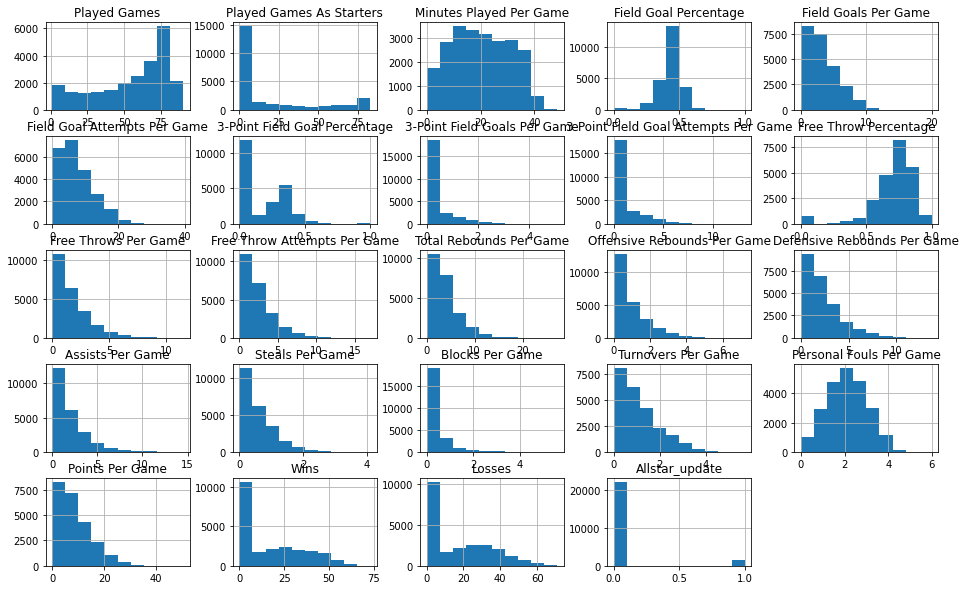

In [30]:
player_data_nonan[player_data_nonan.columns[3:]].hist(figsize=(16,10)) #不知道把他们scale一下效果会不会更好

array([[<AxesSubplot:title={'center':'Assists Per Game'}>,
        <AxesSubplot:title={'center':'Steals Per Game'}>]], dtype=object)

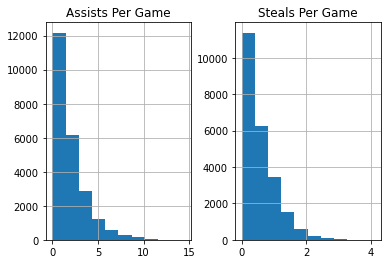

In [31]:
player_data_nonan[['Assists Per Game','Steals Per Game']].hist()

<AxesSubplot:xlabel='Free Throw Percentage'>

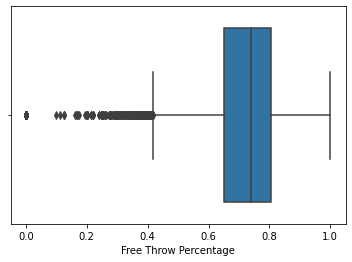

In [32]:
sns.boxplot(x=player_data_nonan['Free Throw Percentage'])

# Bivariate Analysis

让我们看看有什么关联的columns，得分，命中，命中2，出手2跟全明星correlation最高

In [33]:
player_data_nonan.corr()

Played Games  Played Games As Starters  \
Played Games                              1.000000                  0.432208   
Played Games As Starters                  0.432208                  1.000000   
Minutes Played Per Game                   0.636650                  0.602473   
Field Goal Percentage                     0.374987                  0.268147   
Field Goals Per Game                      0.566833                  0.513004   
Field Goal Attempts Per Game              0.543209                  0.471302   
3-Point Field Goal Percentage             0.129390                  0.298561   
3-Point Field Goals Per Game              0.167697                  0.395344   
3-Point Field Goal Attempts Per Game      0.155061                  0.400102   
Free Throw Percentage                     0.394381                  0.194001   
Free Throws Per Game                      0.456892                  0.397280   
Free Throw Attempts Per Game              0.453263                  0.385865   
Total Rebounds Per Game                   0.464263                  0.369989   
Offensive Rebounds Per Game               0.326326                  0.427721   
Defensive Rebounds Per Game               0.374874                  0.576638   
Assists Per Game                          0.407993                  0.417391   
Steals Per Game                           0.362990                  0.576026   
Blocks Per Game                           0.242580                  0.410471   
Turnovers Per Game                        0.344758                  0.608612   
Personal Fouls Per Game                   0.560158                  0.326142   
Points Per Game                           0.556433                  0.521476   
Wins                                      0.406108                  0.573406   
Losses                                    0.366084                  0.552683   
Allstar_update                            0.210294                  0.232704   

                                      Minutes Played Per Game  \
Played Games                                         0.636650   
Played Games As Starters                             0.602473   
Minutes Played Per Game                              1.000000   
Field Goal Percentage                                0.370075   
Field Goals Per Game                                 0.851825   
Field Goal Attempts Per Game                         0.823964   
3-Point Field Goal Percentage                        0.210812   
3-Point Field Goals Per Game                         0.339394   
3-Point Field Goal Attempts Per Game                 0.344507   
Free Throw Percentage                                0.363272   
Free Throws Per Game                                 0.716821   
Free Throw Attempts Per Game                         0.708288   
Total Rebounds Per Game                              0.690529   
Offensive Rebounds Per Game                          0.456812   
Defensive Rebounds Per Game                          0.589992   
Assists Per Game                                     0.645351   
Steals Per Game                                      0.574917   
Blocks Per Game                                      0.336518   
Turnovers Per Game                                   0.613197   
Personal Fouls Per Game                              0.644012   
Points Per Game                                      0.851094   
Wins                                                 0.297346   
Losses                                               0.290517   
Allstar_update                                       0.391606   

                                      Field Goal Percentage  \
Played Games                                       0.374987   
Played Games As Starters                           0.268147   
Minutes Played Per Game                            0.370075   
Field Goal Percentage                              1.000000   
Field Goals Per Game                               0.358723   
Field Goal Attempts Per Game     

/home/damian/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


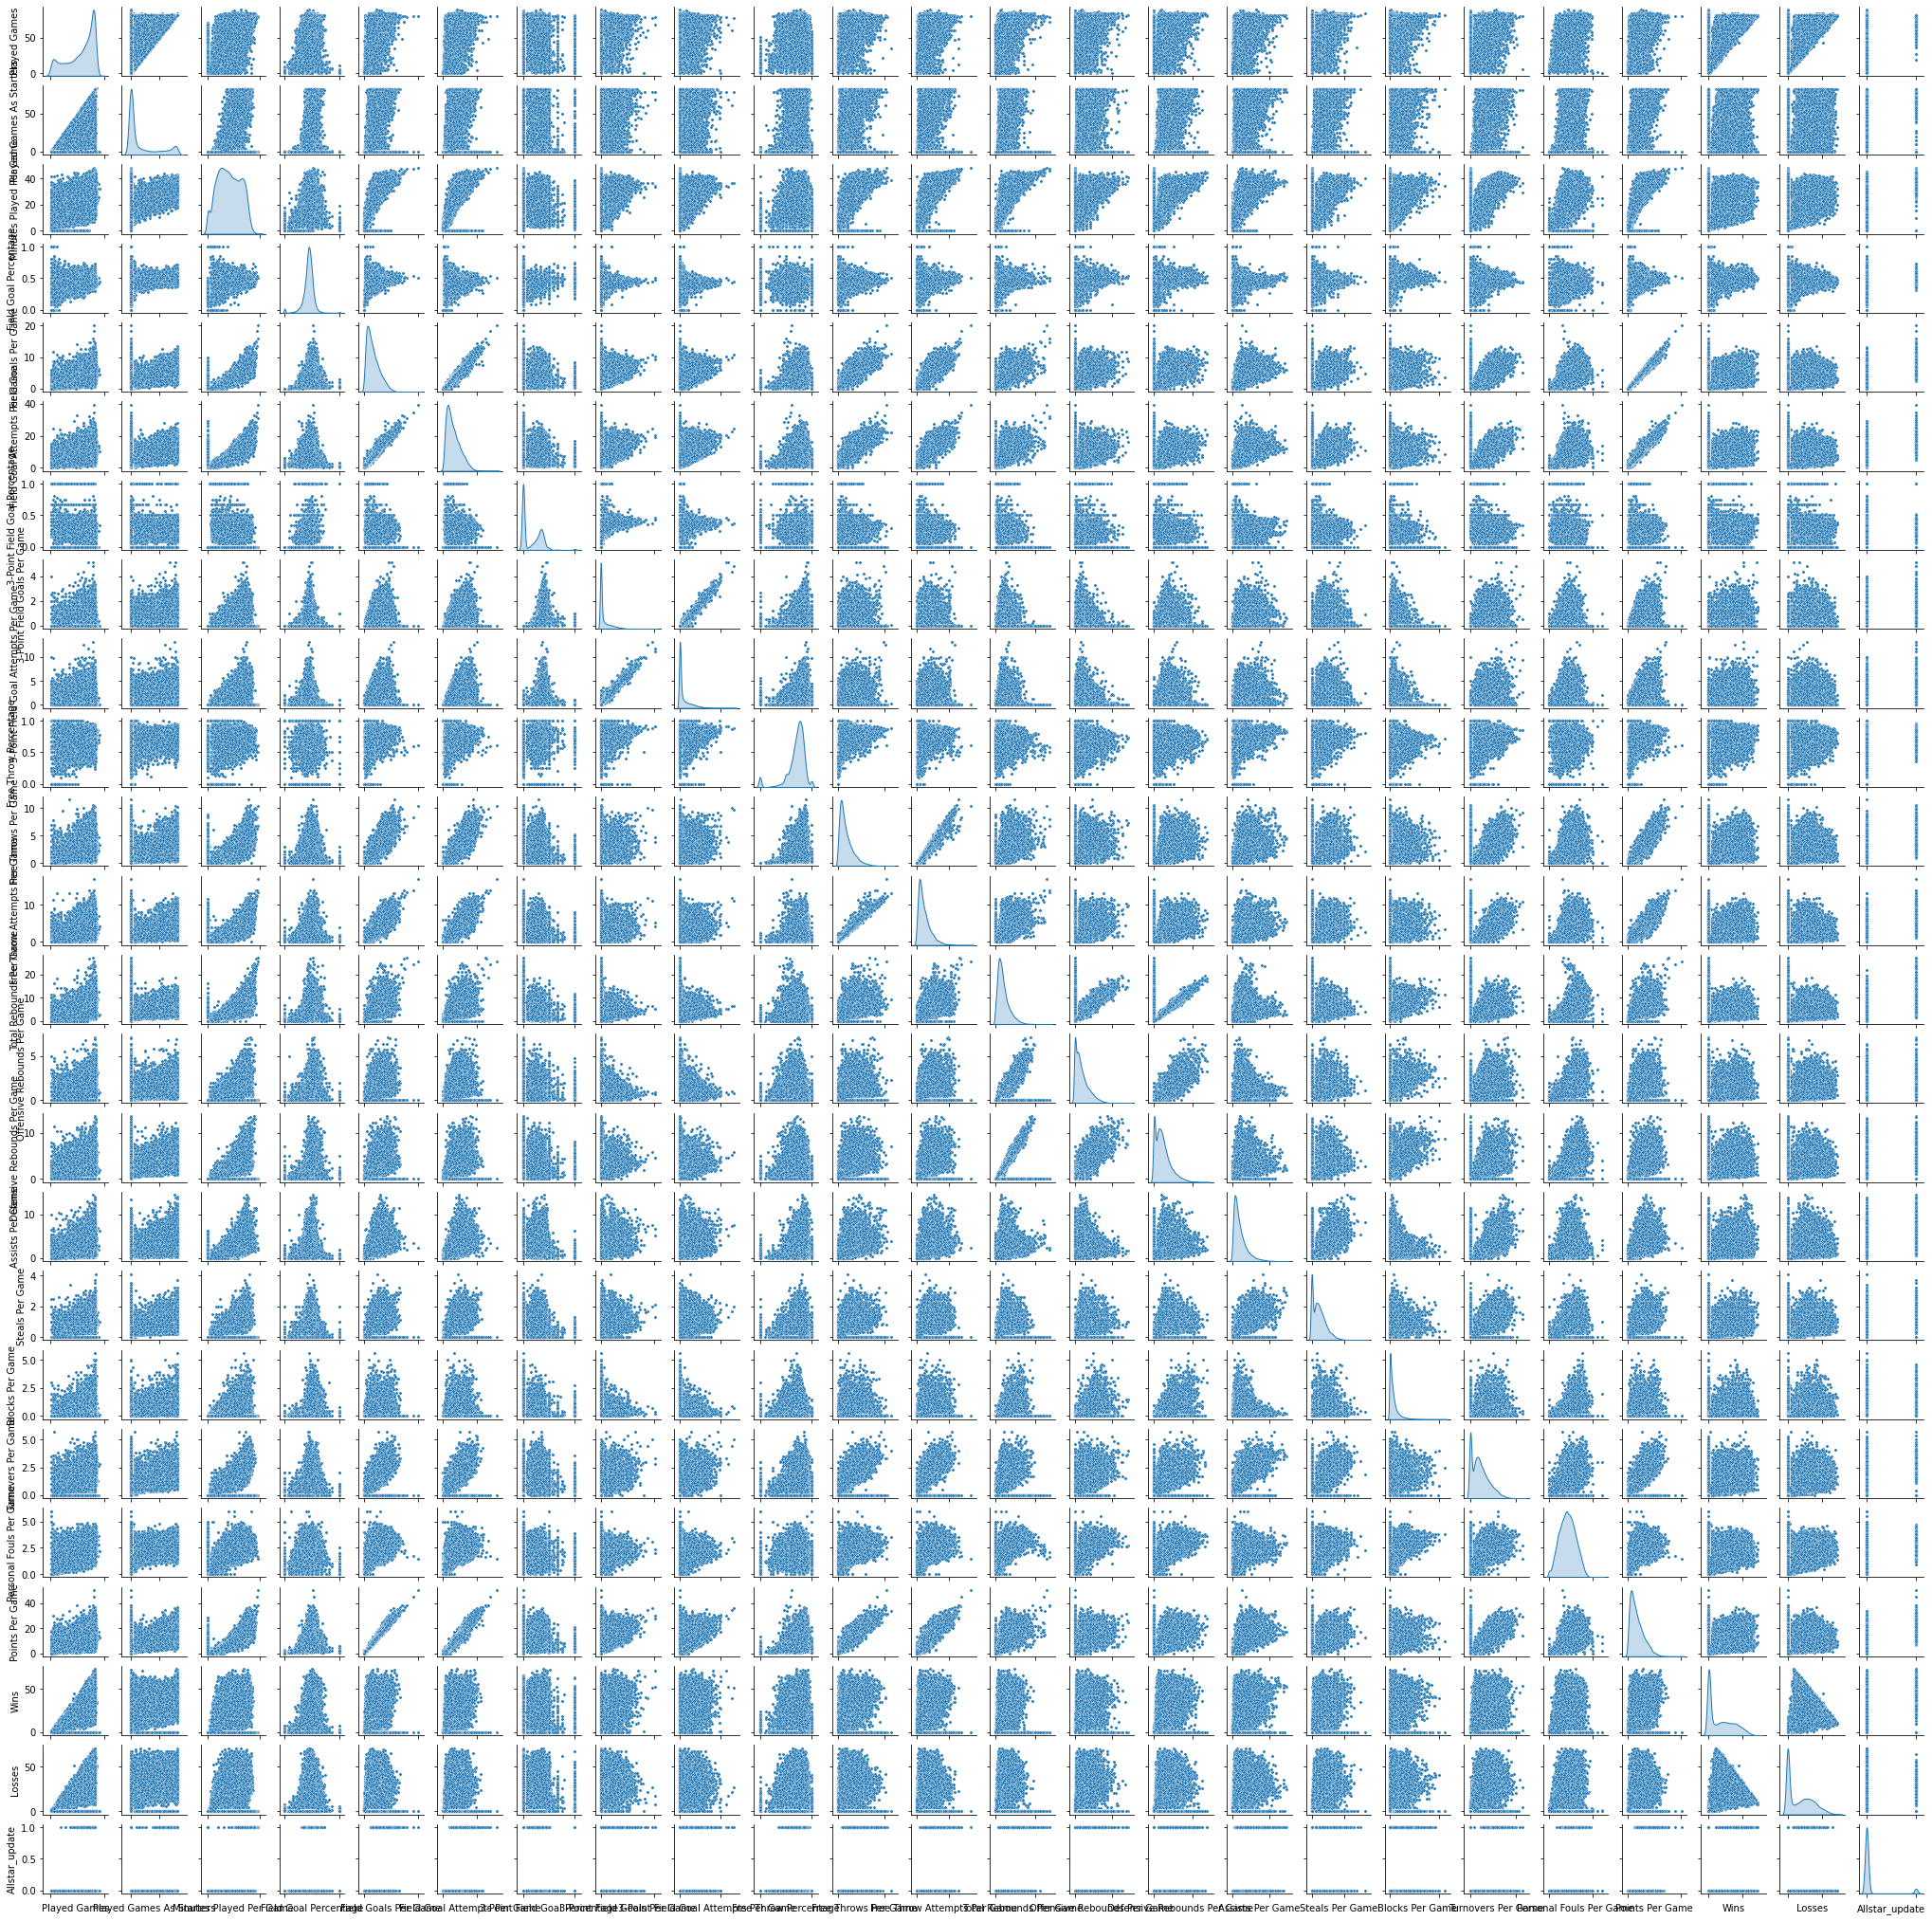

In [34]:
pp = sns.pairplot(player_data_nonan[player_data_nonan.columns[3:]], palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

<AxesSubplot:xlabel='Field Goal Attempts Per Game', ylabel='Field Goals Per Game'>

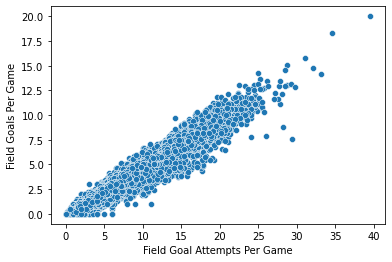

In [35]:
sns.scatterplot(data=player_data_nonan, x="Field Goal Attempts Per Game", y="Field Goals Per Game")

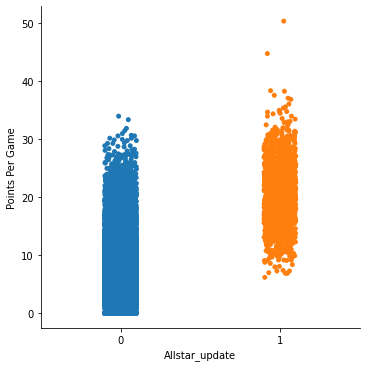

In [39]:
sns.catplot(data=player_data_nonan, y="Points Per Game", x="Allstar_update", order=[0,1])

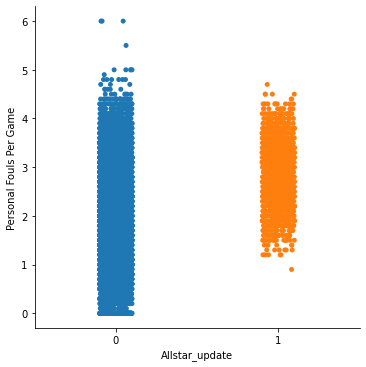

In [43]:
sns.catplot(data=player_data_nonan, x="Allstar_update", y="Personal Fouls Per Game")

看来大于30分通常都进全明星

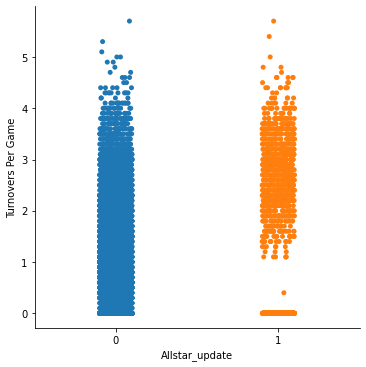

In [44]:
sns.catplot(data=player_data_nonan, x="Allstar_update", y="Turnovers Per Game")

# Model

In [45]:
from sklearn.model_selection import train_test_split

In [195]:
X = player_data_nonan[player_data_nonan.columns[3:-1]].values
X = np.insert(X, 0, 1, axis=1)

In [196]:
len(X[0])

24

In [197]:
y = player_data_nonan['Allstar_update'].values

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [199]:
len(X_train), len(X_test), len(y_train), len(y_test)

(17656, 5886, 17656, 5886)

# Baseline

In [200]:
X[0][-3] # points

2.8

In [201]:
baseline = []
for x in X_test:
    if x[-3] >= 15:
        baseline.append(1)
    else:
        baseline.append(0)

In [202]:
baseAccu = sum(baseline == y_test)/len(baseline)

In [203]:
baseAccu

0.8873598369011213

# Prediction

In [319]:
clf = LogisticRegression(C=1000).fit(X_train, y_train)
pred = clf.predict(X_test)
clf.score(X_train, y_train)

0.9617693701857726

In [320]:
clf.score(X_test, y_test)

0.9604145429833503

In [321]:
count = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        count += 1
count / len(pred)

0.9604145429833503

试试把他全scale看看

In [249]:
from sklearn.preprocessing import MinMaxScaler

In [250]:
scaler = MinMaxScaler()
scaler.fit(X)
XX = scaler.transform(X)

In [251]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, y, test_size=0.25)

In [305]:
clf = LogisticRegression(C=1000).fit(XX_train, yy_train)
pred = clf.predict(XX_test)
print(clf.score(XX_train, yy_train))
print(clf.score(XX_test, yy_test))

0.9150430448572723
0.9172612979952429


# Delete Some Features

In [263]:
corrs = player_data_nonan.corr()['Allstar_update']

In [272]:
from pandas import Series

In [273]:
Series.sort_values(corrs)

Losses                                 -0.042380
3-Point Field Goal Percentage          -0.007104
3-Point Field Goal Attempts Per Game    0.079597
3-Point Field Goals Per Game            0.082758
Wins                                    0.091709
Offensive Rebounds Per Game             0.115431
Free Throw Percentage                   0.115653
Field Goal Percentage                   0.116869
Blocks Per Game                         0.157129
Steals Per Game                         0.185655
Turnovers Per Game                      0.190842
Defensive Rebounds Per Game             0.197860
Played Games                            0.210294
Personal Fouls Per Game                 0.220921
Played Games As Starters                0.232704
Assists Per Game                        0.355493
Total Rebounds Per Game                 0.376806
Minutes Played Per Game                 0.391606
Field Goal Attempts Per Game            0.491507
Field Goals Per Game                    0.507231
Points Per Game     

In [281]:
newCorrs = Series.sort_values(corrs)[-12:]

In [282]:
newCorrs

Played Games                    0.210294
Personal Fouls Per Game         0.220921
Played Games As Starters        0.232704
Assists Per Game                0.355493
Total Rebounds Per Game         0.376806
Minutes Played Per Game         0.391606
Field Goal Attempts Per Game    0.491507
Field Goals Per Game            0.507231
Points Per Game                 0.522980
Free Throw Attempts Per Game    0.530832
Free Throws Per Game            0.538246
Allstar_update                  1.000000
Name: Allstar_update, dtype: float64

['Played Games', 'Played Games As Starters',
       'Minutes Played Per Game', 'Field Goal Percentage',
       'Field Goals Per Game', 'Field Goal Attempts Per Game',
       '3-Point Field Goal Percentage', '3-Point Field Goals Per Game',
       '3-Point Field Goal Attempts Per Game', 'Free Throw Percentage',
       'Free Throws Per Game', 'Free Throw Attempts Per Game',
       'Total Rebounds Per Game', 'Offensive Rebounds Per Game',
       'Defensive Rebounds Per Game', 'Assists Per Game', 'Steals Per Game',
       'Blocks Per Game', 'Turnovers Per Game', 'Personal Fouls Per Game',
       'Points Per Game', 'Wins', 'Losses']

In [280]:
X[0]

array([ 1.   ,  5.   ,  1.   , 10.   ,  0.714,  1.   ,  1.4  ,  0.   ,
        0.   ,  0.   ,  1.   ,  0.8  ,  0.8  ,  2.   ,  0.4  ,  1.6  ,
        0.6  ,  0.6  ,  0.2  ,  0.8  ,  1.2  ,  2.8  ,  2.   ,  3.   ])

In [283]:
XXX = []
for x in X:
    row = [1.0, x[1], x[2], x[3], x[5], x[6], x[11], x[12], x[13], x[16], x[20], x[21]]
    XXX.append(row)

In [285]:
len(XXX)

23542

In [286]:
XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(XXX, y, test_size=0.25)

In [306]:
clf = LogisticRegression(C=1000).fit(XXX_train, yyy_train)
pred = clf.predict(XXX_test)
print(clf.score(XXX_train, yyy_train))
print(clf.score(XXX_test, yyy_test))

0.8954463072043498
0.8924566768603466


In [326]:
scaler.fit(XXX)
XXXX = scaler.transform(XXX)

In [327]:
XXXX_train, XXXX_test, yyyy_train, yyyy_test = train_test_split(XXXX, y, test_size=0.25)

In [329]:
clf = LogisticRegression(C=1000).fit(XXXX_train, yyyy_train)
pred = clf.predict(XXXX_test)
print(clf.score(XXXX_train, yyyy_train))
print(clf.score(XXXX_test, yyyy_test))

0.9544064340734028
0.9478423377505947


# SVM

In [310]:
from sklearn import svm

In [313]:
clf = svm.SVC(C=1000).fit(X_train, y_train)

In [314]:
pred = clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.946313285762827


In [322]:
clf = svm.SVC(C=1000).fit(XX_train, yy_train)

In [323]:
pred = clf.predict(XX_test)
print(clf.score(XX_train, yy_train))
print(clf.score(XX_test, yy_test))

0.9629587675577708
0.9604145429833503


In [330]:
clf = svm.SVC(C=1000).fit(XXX_train, yyy_train)

In [331]:
pred = clf.predict(XXX_test)
print(clf.score(XXX_train, yyy_train))
print(clf.score(XXX_test, yyy_test))

1.0
0.9454638124362895


In [334]:
clf = svm.SVC(C=1).fit(XXXX_train, yyyy_train)

In [335]:
pred = clf.predict(XXXX_test)
print(clf.score(XXXX_train, yyyy_train))
print(clf.score(XXXX_test, yyyy_test))

0.9532170367014047
0.9466530750934421
